<a href="https://colab.research.google.com/github/Ruthmwaura/module_2_week_3_ip/blob/main/Hypothyroidism(Nairobi_Hospital).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HYPOTHYROIDISM 


##**Business understanding**

a) Specifying the Data Analytic Question

Prediciting if the patient's symptoms indicate they have hypothyroid.

b) Defining the Metric for Success

Success will be pegged on the ability to create a model that has high accuracy on predicting if a patient have hypothyroid from their symptoms.

c) Understanding the context
Hypothyroidism is a common endocrine disorder resulting from deficiency of thyroid hormone.The signs and symptoms of hypothyroidism vary, depending on the severity of the hormone deficiency.Major signs include; fatigue,weight gain,increased sensitivity to cold,Constipation,Dry skin,Puffy face,Hoarseness and Muscle weakness

d) Recording the Experimental Design

To successfully conduct this project the we will use CRISP DM, following steps will be taken in order:

-Business understanding

-Data understanding

-Data preparation

-explanatory data analysis

-modelling

-evaluation

-challenging solution

e)Data appropriateness

The data have variables that will adequately give answers to the analytical question.

In [ ]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##**Data understanding**

In [ ]:
#loading data
from google.colab import files
uploaded = files.upload()

Saving hypothyroid.csv to hypothyroid.csv


In [ ]:
#saving the data in a dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['hypothyroid.csv']))

In [ ]:
#previewing data
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
##checking number of columns and rows
print('The hypothyroid dataset has '+str(df.shape[0]) + ' rows and '+ str(df.shape[1])+ ' columns')

The hypothyroid dataset has 3163 rows and 26 columns


In [ ]:
#listing all the columns
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [ ]:
#checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

many columns that are supposed to be numeric are in object datatype. we will need to change them.

In [ ]:
#looking at data statistical description
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


##**Data Preparation**

###validity

all columns will be used for the analysis and modelling

###accuracy

we will assume the data we are using is accurate

###consistency

we will look for duplicates and change datatypes

In [ ]:
#checking for duplicates
df.duplicated().any()

True

the dataset has some duplicates. we will drop them

In [ ]:
#dropping the duplicate
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


In [ ]:
#confirming they've been dropped
df.duplicated().any()

False

###completeness
we will check for null values

In [ ]:
#checking for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

we do not have null values but when you look at the data there are '?' entries. we will replace them with Nan

In [ ]:
#replacing '?' with 'nan'
df.replace(['?'], np.nan, inplace=True)

In [ ]:
#confirming null values
df.isnull().sum()

status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64

In [ ]:
#changing datatype of 'age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG'
columns=['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']
for column in df.columns:
  if column in columns:
    df[column]= pd.to_numeric(df[column])
  else:
    df[column] =df[column].astype('category')

In [ ]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [ ]:
#the TBG has so many missing values.
#we will drop it for it does not give us any meaningful information
df.drop(['TBG'],axis=1, inplace=True)

In [ ]:
#replacing the nullvalues in the age column with the mean
df['age']= df['age'].fillna(df['age'].mean(), axis = 0)


In [ ]:
#replacing the null values in th other numerical columns with 0
columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']
df[columns_2] = df[columns_2].fillna(0)

In [ ]:
#age is the only column with null values so far
#replacing the null values with the mode
df.apply(lambda x: x.fillna(x.value_counts().index[0],inplace=True))

status                       None
age                          None
sex                          None
on_thyroxine                 None
query_on_thyroxine           None
on_antithyroid_medication    None
thyroid_surgery              None
query_hypothyroid            None
query_hyperthyroid           None
pregnant                     None
sick                         None
tumor                        None
lithium                      None
goitre                       None
TSH_measured                 None
TSH                          None
T3_measured                  None
T3                           None
TT4_measured                 None
TT4                          None
T4U_measured                 None
T4U                          None
FTI_measured                 None
FTI                          None
TBG_measured                 None
dtype: object

In [ ]:
#confirming null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

###uniformity
we will check for outliers

In [ ]:
numerical_data= df.select_dtypes(exclude='category')

Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

(numerical_data < (Q1 - 1.5 * IQR)) |(numerical_data > (Q3 + 1.5 * IQR))

,age,TSH,T3,TT4,T4U,FTI
0,False,True,False,False,True,True
1,False,True,False,False,False,True
2,False,False,False,True,False,True
3,False,True,False,True,False,True
4,False,True,False,False,False,False
...,...,...,...,...,...,...
3158,False,True,False,False,False,False
3159,False,False,False,False,False,False
3160,False,False,False,False,False,False
3161,False,False,False,False,False,False


##Univariate

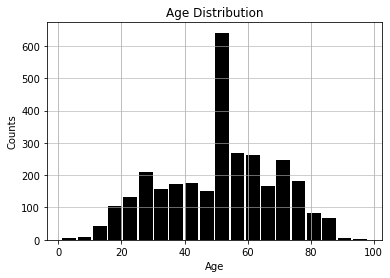

In [ ]:
#age distribution 
size, scale = 10, 20
data= df['age']

data.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

alot of patient are between age 50 and 55 years

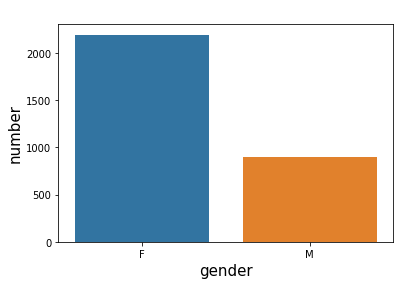

In [ ]:
#gender distribution
sns.countplot('sex',data = df)
plt.xlabel("gender",fontsize=15)
plt.ylabel("number",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()

most patients were female

In [ ]:
df['status'].value_counts()

negative       2945
hypothyroid     141
Name: status, dtype: int64

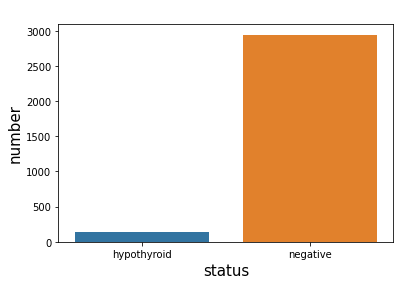

In [ ]:
#visualizing status
sns.countplot('status',data = df)
plt.xlabel("status",fontsize=15)
plt.ylabel("number",fontsize=15)
plt.title("Countplot of status",fontsize=16,color="white")
plt.show()

most people did not have hypothyroid 

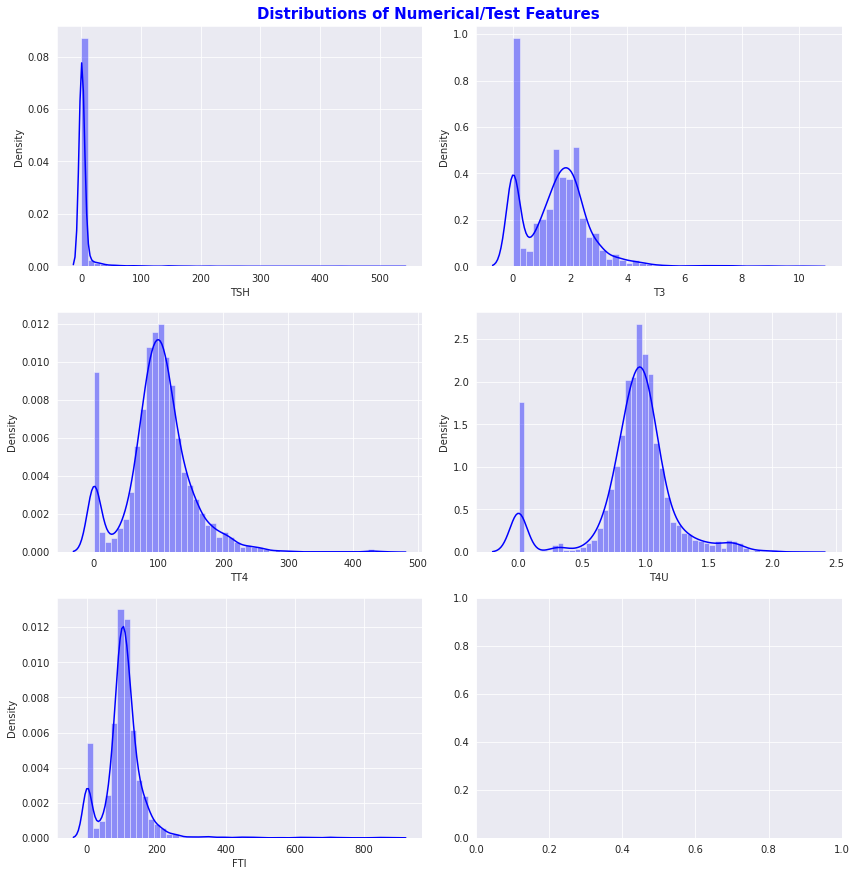

In [ ]:
#visualizing TSH , T3 , TT4 , T4U , FTI


# First we create an array of the numerical columns
columns = ['TSH','T3','TT4','T4U','FTI']

#visualizing the distributions using histograms
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Distributions of Numerical/Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), df, columns):
  sns.distplot(df[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

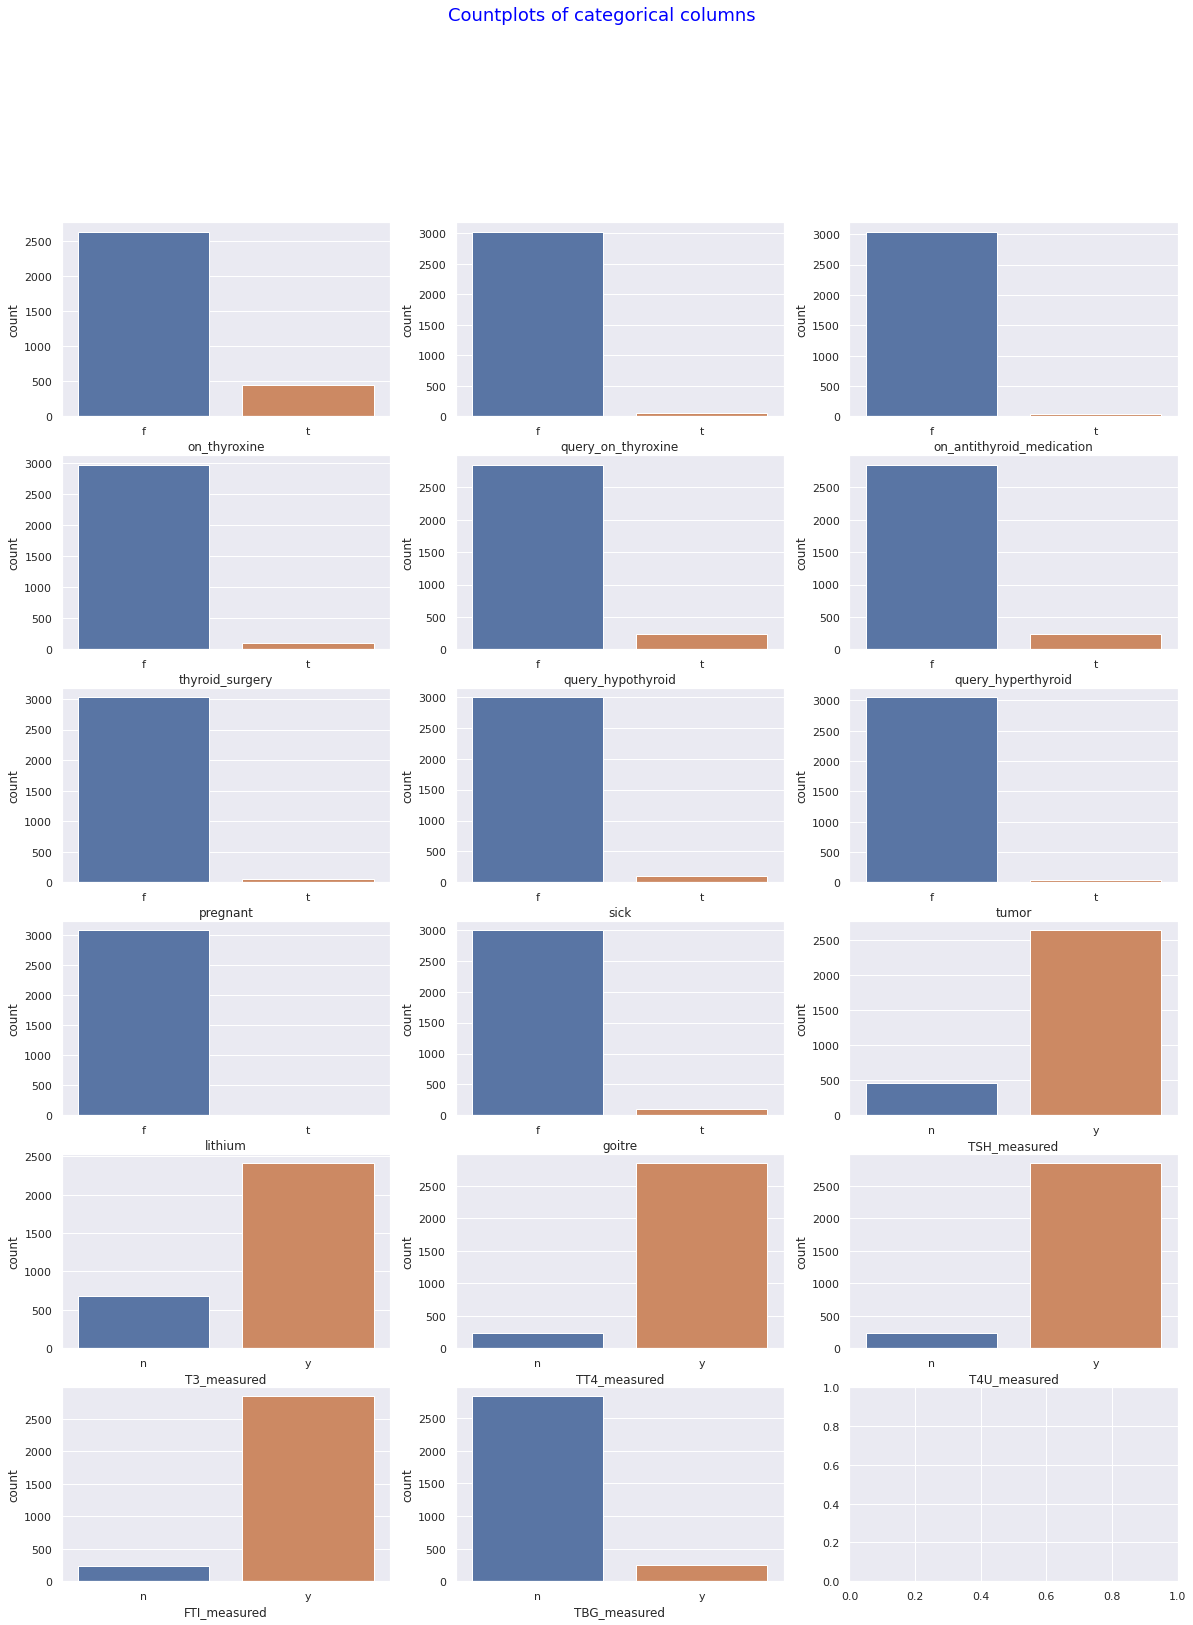

In [ ]:
#visualizing categorical variables

categorical_columns_1 =['on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sns.set(style = 'darkgrid', context = 'notebook')
corr = df.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), df, categorical_columns_1):
   sns.countplot(df[column], ax=ax)

##Bivariate

In [ ]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
dtype: object

In [ ]:
categorical_columns=['sex', 'status','on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


In [ ]:
#encoding catgorical variables
le = LabelEncoder()

df[categorical_columns]=df[categorical_columns].apply(le.fit_transform)


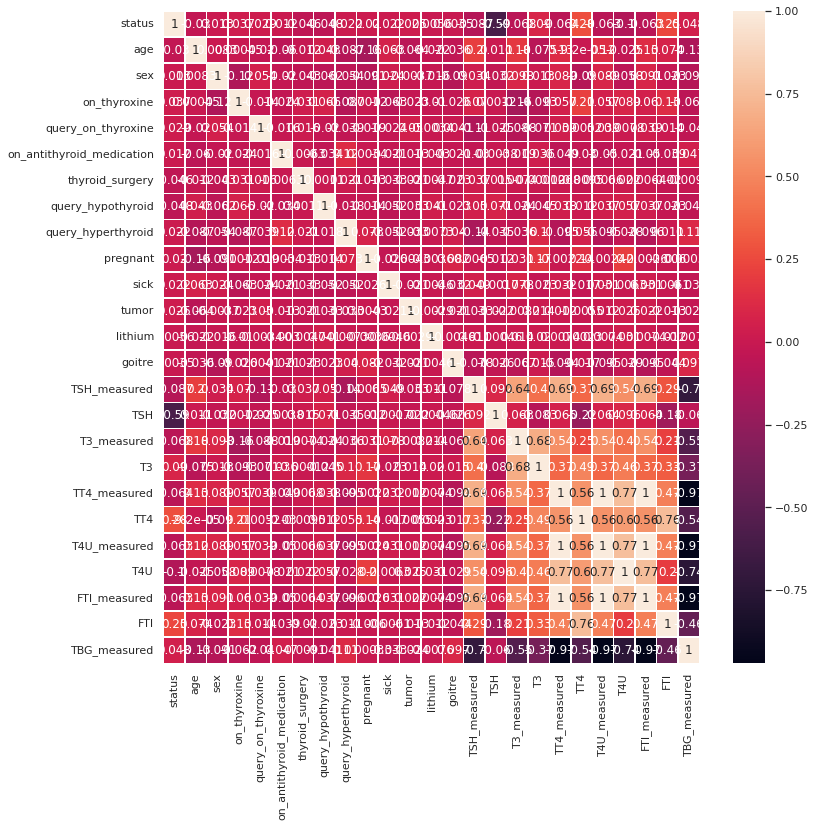

In [ ]:
#checking for corrlation
#Plottting a heatmap to show correlation of different numerical variables

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot=True,linewidths=.5, ax=ax)

Using a threshold of 0.5, we observe that:

TT4 has high positive correlation with T4U  and FTI

In [ ]:
#checking for multicollinearity
#using correlations to compute the VIF score for each variable
independent=df.drop(['status'], axis=1)
correlations=independent.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
age,1.172987,0.043691,0.009123,-0.005170,0.038468,0.022317,-0.037426,0.025434,0.117951,-0.021226,...,0.023963,-0.407921,0.405186,-0.409792,-0.132099,0.785847,0.159042,-0.347348,-0.005819,0.034291
sex,0.043691,1.111413,0.086938,-0.040016,0.020843,0.043247,0.053696,0.043035,0.026940,0.001387,...,0.048347,-0.002222,-0.103169,-0.210994,-0.021074,0.383815,0.448948,-0.697925,0.230053,0.033442
on_thyroxine,0.009123,0.086938,1.183743,0.023737,0.006585,-0.029760,-0.033927,0.104898,0.015460,0.063087,...,-0.077700,0.272531,0.136894,0.100856,-0.556156,0.866110,0.152897,-0.872362,0.191288,0.106329
query_on_thyroxine,-0.005170,-0.040016,0.023737,1.054081,0.006225,-0.028607,0.017448,0.048262,-0.000301,0.022072,...,0.011826,0.080080,0.008795,-0.232900,-0.035222,-0.167001,0.065910,0.264166,0.048747,0.176764
on_antithyroid_medication,0.038468,0.020843,0.006585,0.006225,1.027134,0.013616,0.032256,-0.119195,0.018183,0.011993,...,0.005741,0.072496,-0.096091,-0.071524,0.063996,0.084792,-0.006865,0.052409,0.013475,0.049396
thyroid_surgery,0.022317,0.043247,-0.029760,-0.028607,0.013616,1.011051,0.009425,-0.034055,0.025978,0.032680,...,0.006225,-0.003396,0.011607,-0.066545,0.065406,0.139095,-0.071620,0.021988,-0.018686,0.031907
query_hypothyroid,-0.037426,0.053696,-0.033927,0.017448,0.032256,0.009425,1.030372,-0.001311,0.018024,0.055231,...,-0.058386,0.049211,0.047825,-0.057933,-0.052049,0.077515,-0.031996,0.058984,0.068055,0.097047
query_hyperthyroid,0.025434,0.043035,0.104898,0.048262,-0.119195,-0.034055,-0.001311,1.093084,-0.040496,0.040465,...,-0.031299,0.035879,-0.157641,-0.046457,-0.239153,0.078759,0.140731,-0.252562,0.123283,-0.193694
pregnant,0.117951,0.026940,0.015460,-0.000301,0.018183,0.025978,0.018024,-0.040496,1.154962,0.004871,...,0.021826,-0.055181,-0.032798,-0.177824,0.066348,0.704876,-0.618089,0.087675,-0.153907,0.081770
sick,-0.021226,0.001387,0.063087,0.022072,0.011993,0.032680,0.055231,0.040465,0.004871,1.028978,...,0.008995,-0.166603,0.151241,0.030174,-0.095396,0.043675,0.040302,-0.040712,0.054516,0.031987


'T3_measured','TT4_measured','T4U_measured','FTI_measured','FTI','TBG_measured' have a vif score above 5 sign of multicolinearity, we will drop them.

In [ ]:
new_independent=independent.drop(['T3_measured','TT4_measured','T4U_measured','FTI_measured','FTI','TBG_measured'], axis=1)
correlations=new_independent.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3,TT4,T4U
age,1.119388,0.024976,0.045074,-0.006040,0.048375,0.023744,-0.030930,0.030883,0.127740,-0.041571,0.055247,0.023161,0.007334,-0.345104,0.010859,0.159767,-0.062423,0.149935
sex,0.024976,1.057375,0.098923,-0.066602,0.025945,0.049155,0.055511,0.043268,0.075904,-0.004339,0.015936,0.018355,0.092134,-0.091777,0.057214,-0.057517,0.115487,0.038387
on_thyroxine,0.045074,0.098923,1.142933,0.028742,-0.002078,-0.031875,-0.042520,0.096723,0.001441,0.074351,0.019377,0.011154,0.020694,-0.069967,-0.054219,0.295326,-0.406451,0.062683
query_on_thyroxine,-0.006040,-0.066602,0.028742,1.035561,0.007269,-0.025632,0.017719,0.051431,0.026481,0.023511,-0.041974,0.002417,-0.006035,0.166947,0.013711,0.081386,-0.056114,-0.112871
on_antithyroid_medication,0.048375,0.025945,-0.002078,0.007269,1.024818,0.012916,0.030308,-0.120274,0.013594,0.015473,0.016227,0.003766,0.033440,0.001104,0.009369,-0.055443,0.067990,-0.000043
thyroid_surgery,0.023744,0.049155,-0.031875,-0.025632,0.012916,1.010241,0.008899,-0.033959,0.019781,0.032994,0.023429,0.006736,0.025341,-0.056928,0.005722,0.003273,0.058595,-0.027056
query_hypothyroid,-0.030930,0.055511,-0.042520,0.017719,0.030308,0.008899,1.027918,-0.002838,0.015134,0.056770,0.030665,-0.040440,0.021676,-0.032931,-0.051389,0.075902,0.007969,-0.070605
query_hyperthyroid,0.030883,0.043268,0.096723,0.051431,-0.120274,-0.033959,-0.002838,1.087187,-0.041186,0.041215,0.041892,0.009232,-0.016904,0.206370,-0.022129,-0.131511,-0.125591,0.056502
pregnant,0.127740,0.075904,0.001441,0.026481,0.013594,0.019781,0.015134,-0.041186,1.105220,0.006526,0.013550,0.015747,-0.070348,0.130448,0.016732,-0.115134,0.016814,-0.253504
sick,-0.041571,-0.004339,0.074351,0.023511,0.015473,0.032994,0.056770,0.041215,0.006526,1.020168,0.020819,0.002392,0.028261,-0.062120,0.008651,0.049711,-0.005601,0.008173


##Multivariate

In [ ]:
#PCA
#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = new_independent

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

#number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on each component

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3', 'TT4',
        'T4U']


most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

#dataframe
df1 = pd.DataFrame(dic.items())
df1

,0,1
0,PC0,TT4
1,PC1,TSH
2,PC2,age
3,PC3,T3
4,PC4,sex
5,PC5,on_thyroxine
6,PC6,on_thyroxine
7,PC7,query3hypothyroid
8,PC8,query_hyperthyroid
9,PC9,T4U


##Modelling

###Decision trees

####Random forest

In [ ]:
#target variable and independent variables
X=new_independent
y=df['status'].values

#split the independent and dependent variables into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#defining the model
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

#training the model
forest = forest.fit(X_train, y_train)

#predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
#measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9881209503239741 and the f1 score is 0.9938306225462703


              precision    recall  f1-score   support

           0       0.97      0.74      0.84        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.98      0.87      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[ 29,  10],
       [  1, 886]])

In [ ]:
#checking the importance of features in predicting the target variable
impo_df = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
TSH,0.4848
TT4,0.2931
T4U,0.0763
T3,0.0491
TSH_measured,0.0368
age,0.0258
thyroid_surgery,0.0064
on_thyroxine,0.0056
on_antithyroid_medication,0.0050


the most important variable in predicting the status of the patient is TSH

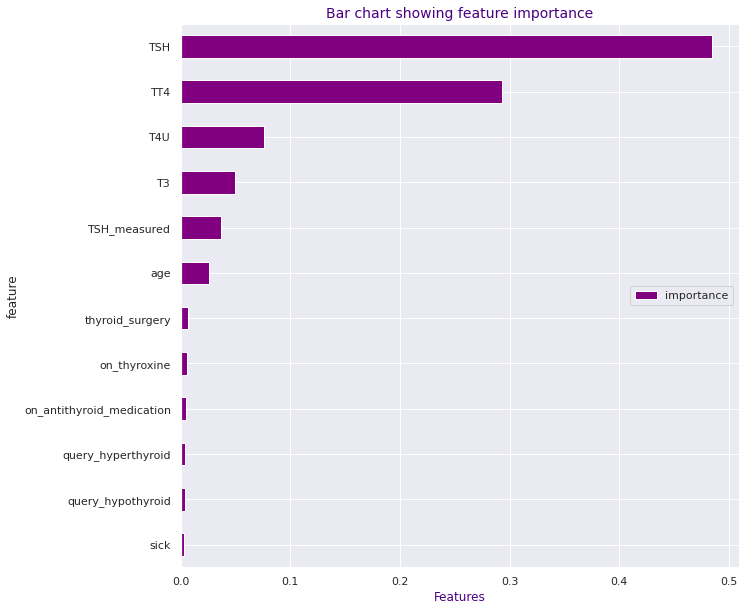

In [ ]:
#creating a bar chart of feature importance 

impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [ ]:
#selecting only important features and the y variable

X = df[['TSH','TT4','T4U','T3','TSH_measured','age','thyroid_surgery','on_thyroxine','on_antithyroid_medication',
        'query_hyperthyroid','query_hypothyroid','sick']].values

y =df['status'].values

#splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#instantiating the model

forest = RandomForestClassifier(random_state = 0)
forest.fit(X_train, y_train)

#making predictions

y_pred = forest.predict(X_test)

#measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.990280777537797 and the f1 score is 0.9949409780775718


              precision    recall  f1-score   support

           0       0.94      0.82      0.88        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.97      0.91      0.94       926
weighted avg       0.99      0.99      0.99       926



array([[ 32,   7],
       [  2, 885]])

the accuracy has improved using the most important variables

#####hyperparameter tuning

In [ ]:

#creating a dictionary of parameters to tune

params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

#setting the number of folds to 10 and instantiating the model

kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

#fitting the grid search with the X and the y variables

search.fit(X, y)

#checking for the best parameters

print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 30}


In [ ]:
#applying the best parameters to the model

#selecting only important features and the y variable

X = df[['TSH','TT4','T4U','T3','TSH_measured','age','thyroid_surgery','on_thyroxine','on_antithyroid_medication',
        'query_hyperthyroid','query_hypothyroid','sick']]

y =df['status'].values

#splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#instantiating the model

forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state = 0)
forest.fit(X_train, y_train)

#making predictions

y_pred = forest.predict(X_test)

#measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9859611231101512 and the f1 score is 0.9927089175546833


              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.96      0.86      0.90       926
weighted avg       0.99      0.99      0.99       926



array([[ 28,  11],
       [  2, 885]])

In [ ]:
!pip install --upgrade scikit-learn==0.20.3
from sklearn.externals.six import StringIO

     |████████████████████████████████| 5.4 MB 6.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


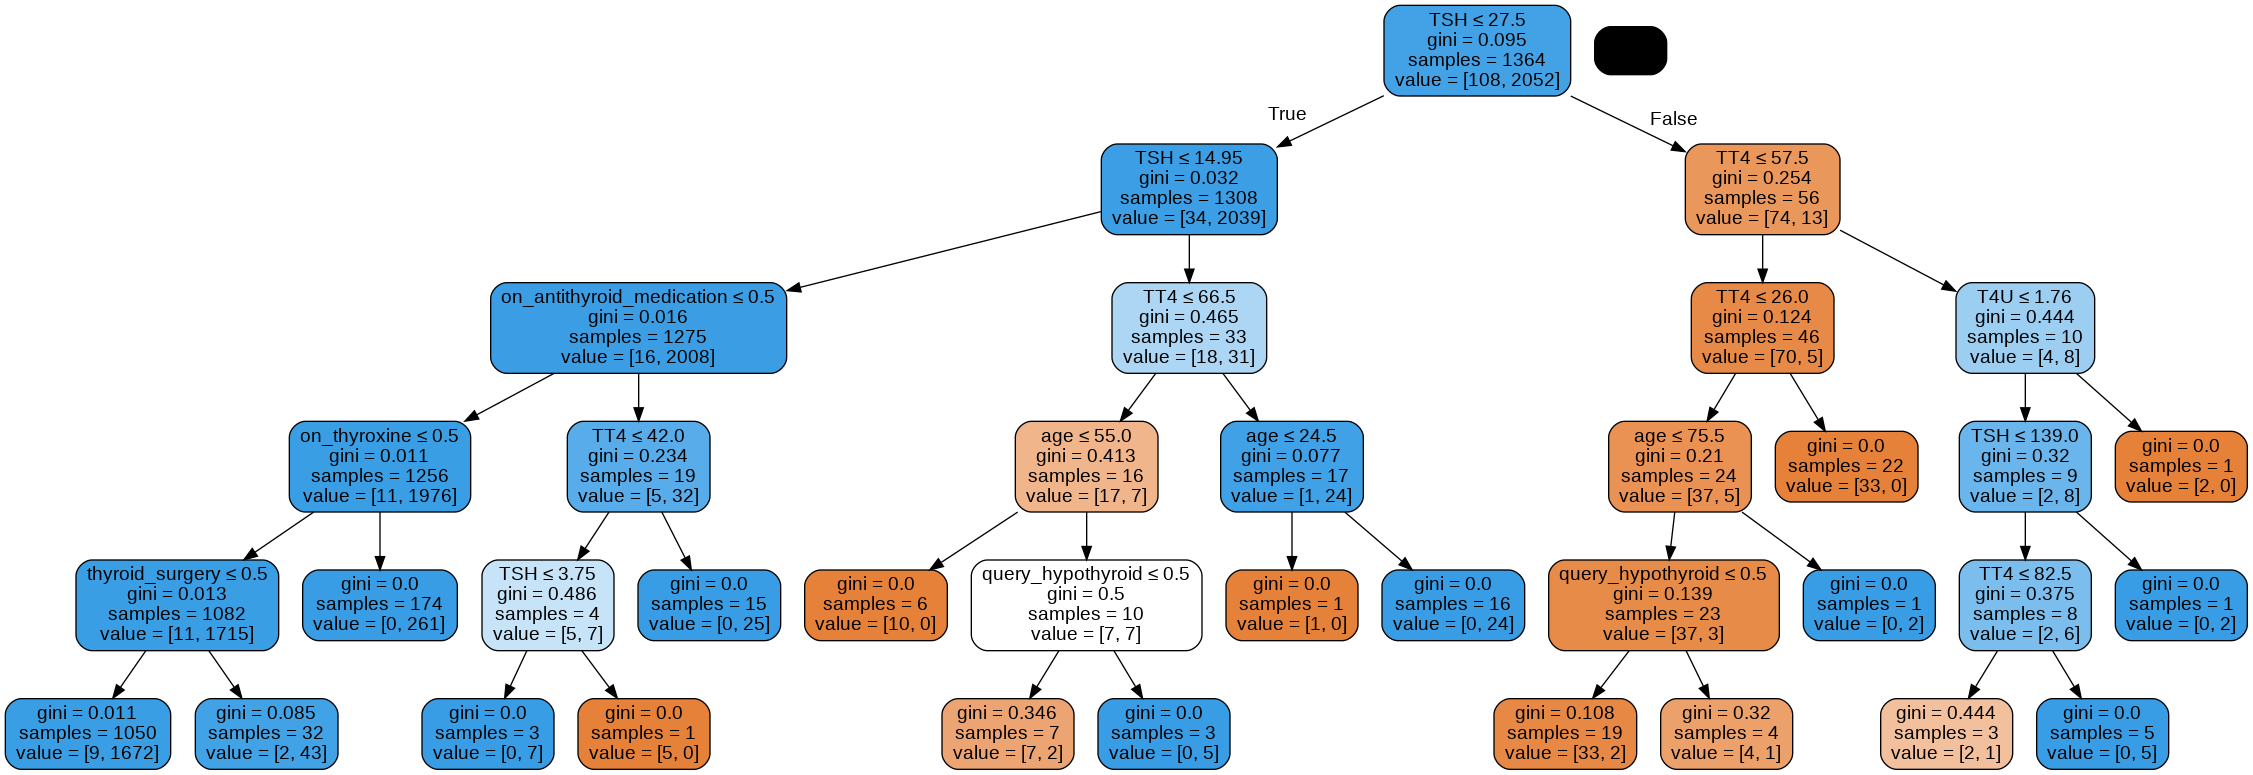

In [ ]:
#visualizing the model
#tree number 5

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50
tree = forest.estimators_[5]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

cross validation of the model

In [ ]:
#performing cross validation of ten folds

scores = cross_val_score(forest, X, y, scoring = 'f1', cv = 10)

#calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

#calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9913990152215162
Standard deviation of the cross validation scores is 0.0034702896264271654


####Ada boosted trees

In [ ]:
#adaboost needs a simple decision tree in its constructor
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)

accuracy_score(y_test, y_pred_ada)

0.9870410367170627

In [ ]:

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred_ada)
f1_1 = f1_score(y_test, y_pred_ada)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred_ada)}')
confusion_matrix(y_test, y_pred_ada)

The accuracy score is: 0.9870410367170627 and the f1 score is 0.9932432432432432


              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.99      0.99      0.99       887

    accuracy                           0.99       926
   macro avg       0.93      0.91      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[ 32,   7],
       [  5, 882]])

Remodelling with the most important features only

In [ ]:
#checking features importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': ada_boost.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df

,importance
feature,
TSH,0.217139
T4U,0.201511
TT4,0.200957
age,0.159742
T3,0.150685
query_hypothyroid,0.021635
on_antithyroid_medication,0.018692
on_thyroxine,0.011527
thyroid_surgery,0.010732


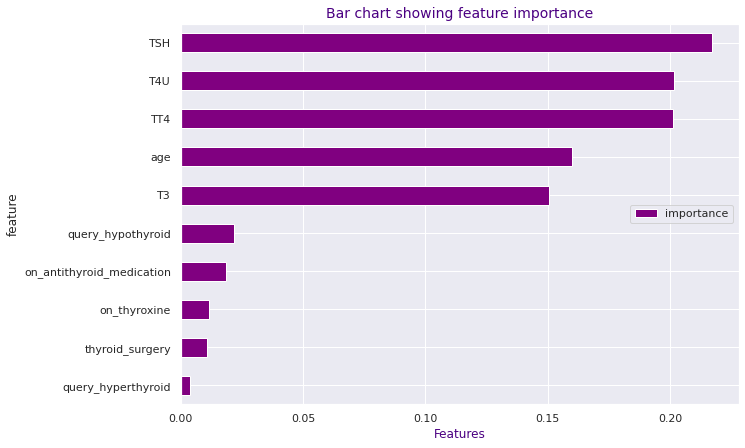

In [ ]:
#visualizing the importance
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 7), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [ ]:
#selecting only important features and the y variable

X = df[['TSH','T4U','TT4','age','T3','query_hypothyroid','on_antithyroid_medication','on_thyroxine','thyroid_surgery','query_hyperthyroid']]

y = df['status'].values

#splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#instantiating the model

ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

#making predictions

y_pred = ada.predict(X_test)

#measuring the accuracy of the model

print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9870410367170627 and the f1 score is 0.9932356257046223


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        39
           1       0.99      0.99      0.99       887

    accuracy                           0.99       926
   macro avg       0.92      0.92      0.92       926
weighted avg       0.99      0.99      0.99       926



array([[ 33,   6],
       [  6, 881]])

Hyperparameter Tuning

In [ ]:
#Creating a dictionary of parameters to tune

params = {'n_estimators': [10, 20, 30, 50, 100],
         'learning_rate': [1, 2, 3, 4, 5]}

#Setting the number of folds to 10 and instantiating the model
 
kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

#Fitting the grid search with the X and the y variables

search.fit(X, y)

#Checking for the best parameters

print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'learning_rate': 1, 'n_estimators': 20}


cross validation

In [ ]:
# Performing cross validation of ten folds
#
scores = cross_val_score(ada, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9911869695267074
Standard deviation of the cross validation scores is 0.0028145674557980313



When comparing Ada and RandomForest they both have similar f1 score so their performance is equal. they are both good fit for the prediction.

###SVM

Comparing svc kernels to find the one with a maximum f1 score - using only two features

In [ ]:
#selecting the independent variables and the target variable

X1 = df[['FTI', 'TSH']].values
y1 =df['status'].values

#instantiating and creating a list of models for iteration

poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

#creating a list of the models and model names

models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
#creating a function that trains a model and returns its accuracy together with the model

def predictor(model, X1, y1):
#splitting the data into training and testing sets
  X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
  
#standardising the data
  sc = StandardScaler()
  X1_train = sc.fit_transform(X1_train)
  X1_test = sc.transform(X1_test)
  
#training the model and making predictions
  model.fit(X1_train, y1_train)
  y1_pred = model.predict(X1_test)
  
#measuring the accuracy of the model
  f1 = f1_score(y1_test, y1_pred)
  acc = accuracy_score(y1_test, y1_pred)
  
#returning the accuracy and the model
  return acc, f1, model

#getting the accuracies of the models  using a for loop

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X1, y1)[0]} and the f1 score is: {predictor(model, X1, y1)[1]}')

The accuracy score of Polynomial is: 0.9827213822894169 and the f1 score is: 0.9910514541387024
The accuracy score of Linear     is: 0.9794816414686826 and the f1 score is: 0.9893557422969187
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.992152466367713


####Hyperparameter tuning to find the optimal C and gamma values

In [ ]:
#creating a dictionary of parameters to tune

params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

#setting the number of folds to 10 and instantiating the model
 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

#selecting the independent variables and the target variable

X = df[['FTI', 'TSH']]
y = df['status'].values

#fitting the grid search with the X and the y variables

search.fit(X, y)

#checking for the best parameters

print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'gamma': 3.5833333333333335, 'C': 101}


####Remodelling with optimal parameters

In [ ]:
# Selecting only important features and the y variable
#
X = df.drop('status', axis = 1)

y = df['status'].values

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Standardising features
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 21, gamma = 0.03125, kernel='linear')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9892008639308856 and the f1 score is 0.9943757030371204


              precision    recall  f1-score   support

           0       0.91      0.82      0.86        39
           1       0.99      1.00      0.99       887

    accuracy                           0.99       926
   macro avg       0.95      0.91      0.93       926
weighted avg       0.99      0.99      0.99       926



array([[ 32,   7],
       [  3, 884]])

In [ ]:
# Performing cross validation of ten folds
#
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.9918770002569607
Standard deviation of the cross validation scores is 0.0036128185686308705


###Conclusion

1.Out of all the models used to predict whether a person has hypothyroid, the AdaBoostClassifier performs as  well as the random forest.

2.The best performing kernel in the SupportVectorClassifier is Linear with an accuracy score 98.9% of and an f1 score of 99.4%